# Angle encoding tests
*Part of TS QAE in Qiskit with angle encoding*

By: Jacob Cybulski<br>
Date: January 2024<br>
Aims: The goal of this tutorial is to test various approaches to angle encoding of data, 
Methods: 
- Experiments with direct angle encoding.
- Experiments with angle encoding via individual qubit amplitudes
- Experiments with state vector execution

Sources: 
1. Stypulkoski, Matthew. 2021. “Answer to ‘How to Plot Probability Histogram and/or Bloch Sphere of Single Qubit in Multi-Qubit Quantum Circuit in Qiskit?’” Quantum Computing Stack Exchange. https://quantumcomputing.stackexchange.com/a/15514.
2. V, Tharrmashastha. 2023. “Answer to ‘Plotting Superposition of Qubits on a Bloch Sphere in Qiskit.’” Stack Overflow. https://stackoverflow.com/a/77501410/11871628.

Notes:
- None at this time

### Test
This test aims to show sample angle encoding of data

In [15]:
import numpy as np
from IPython.display import clear_output
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap
from qiskit.quantum_info import Statevector
from qiskit.utils import algorithm_globals
from qiskit.visualization import plot_histogram, plot_state_city, plot_state_paulivec
from qiskit.visualization import plot_bloch_vector

from qiskit import Aer

#### Data

In [16]:
test_angles = [-np.pi*0.25, np.pi/6]
test_amps = [-0.5, 0.75]

#### Utils

In [17]:
# Converts measurements amplitudes a and b in a|0>+b|1> into bloch vector
def convert_amps_to_xyz(a, b):
    x = 2*np.real(a*np.conjugate(b))
    y = 2*np.imag(b*np.conjugate(a))
    z = a*np.conjugate(a)-b*np.conjugate(b)
    return [x, y, z] 

#### Test 1 - Direct angle encoding

In [18]:
def test_circuit_1(angle, add_meas=True, save_state=False):
    qr = QuantumRegister(2, "q")
    cr = ClassicalRegister(1, "c")
    if add_meas:
        circuit = QuantumCircuit(qr, cr)
    else:
        circuit = QuantumCircuit(qr)
    circuit.ry(angle[0], qr[0])
    circuit.ry(angle[1], qr[1])
    if save_state:
        circuit.save_statevector()
    if add_meas:
        circuit.measure(qr[0], cr[0])
    return circuit

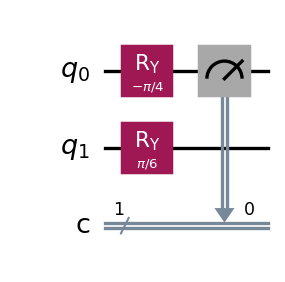

Counts: {'0': 850, '1': 150}


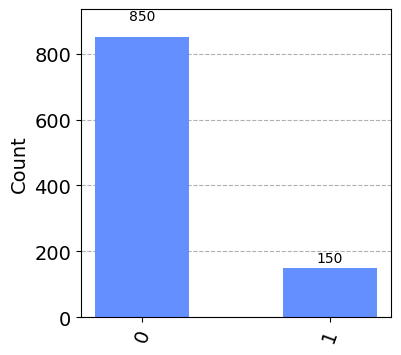

p(0) = 0.85, p(1) = 0.15, amp(0) = 0.922, amp(1) = 0.387
Original Angle:  -0.7853981633974483
Recovered Angle: 0.7953988301841435


In [19]:
circuit1 = test_circuit_1(test_angles)
display(circuit1.draw("mpl", style="iqp", scale=1.2))

backend = Aer.get_backend('aer_simulator')
job = backend.run(circuit1, shots=1000)
result = job.result()
counts = result.get_counts(circuit1)
print(f'Counts: {dict(sorted(counts.items()))}') 

counts0 = counts['0'] if '0' in counts.keys() else 0
counts1 = counts['1'] if '1' in counts.keys() else 0
p0 = counts0/(counts0+counts1)
p1 = counts1/(counts0+counts1)
amp0 = np.sqrt(p0)
amp1 = np.sqrt(p1)

display(plot_histogram(counts, figsize=[4, 4]))
print(f"p(0) = {p0}, p(1) = {p1}, amp(0) = {round(amp0, 3)}, amp(1) = {round(amp1, 3)}")
print(f'Original Angle:  {test_angles[0]}')
print(f'Recovered Angle: {2*np.arccos(amp0)}')


Bloch vector:	[0.71, 0.0, 0.7]


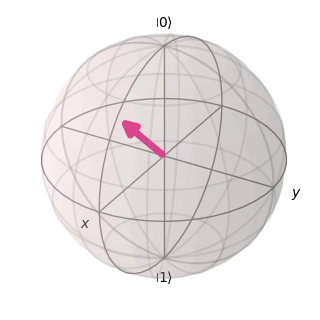

In [20]:
# Extract the Bloch vector components from the state vector
# bloch_vector = convert_amps_to_angles(amp0, amp1)
[x, y, z] = convert_amps_to_xyz(amp0, amp1)
bloch_vector = [x, y, z]
print(f'\nBloch vector:\t{[round(b, 2) for b in bloch_vector]}')

# Plot the Bloch vector on the Bloch sphere, can also be "spherical" is [<r>, <theta>, <phi>]
plot_bloch_vector(bloch_vector, coord_type="cartesian", figsize=[3, 3])

#### Test 4 - State vector execution

In [21]:
def test_circuit_4(angle, add_meas=False, save_state=True):
    qr = QuantumRegister(1, "q")
    cr = ClassicalRegister(1, "c")
    if add_meas:
        circuit = QuantumCircuit(qr, cr)
    else:
        circuit = QuantumCircuit(qr)
    circuit.ry(angle[0], qr[0])
    if save_state:
        circuit.save_statevector()
    if add_meas:
        circuit.measure(qr[0], cr[0])
    return circuit

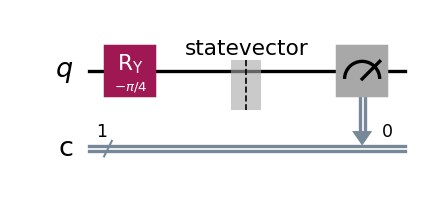

Counts: {'0': 854, '1': 146}


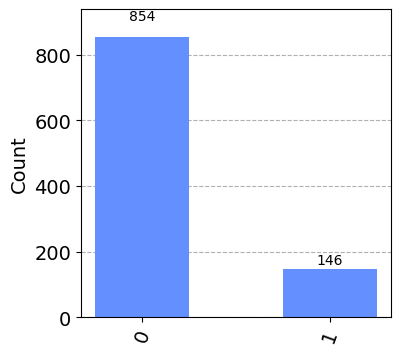

Counts: {'0': 854, '1': 146}
p(0) = 0.854, p(1) = 0.146, amp(0) = 0.924, amp(1) = 0.382
Original Angle:  -0.7853981633974483
Recovered Angle: 0.7841341620511192


In [24]:
# circuit4 = test_circuit_1(test_angles, add_meas=True, save_state=True)
circuit4 = test_circuit_4(test_angles, add_meas=True, save_state=True)
display(circuit4.draw("mpl", style="iqp", scale=1.2))

backend = Aer.get_backend('aer_simulator_statevector')
job = backend.run(circuit4, shots=1000)
result = job.result()
counts = result.get_counts(circuit4)
print(f'Counts: {dict(sorted(counts.items()))}') 

counts0 = counts['0'] if '0' in counts.keys() else 0
counts1 = counts['1'] if '1' in counts.keys() else 0
p0 = counts0/(counts0+counts1)
p1 = counts1/(counts0+counts1)
amp0 = np.sqrt(p0)
amp1 = np.sqrt(p1)

display(plot_histogram(counts, figsize=[4, 4]))
print(f'Counts: {dict(sorted(counts.items()))}') 
print(f"p(0) = {p0}, p(1) = {p1}, amp(0) = {round(amp0, 3)}, amp(1) = {round(amp1, 3)}")
print(f'Original Angle:  {test_angles[0]}')
print(f'Recovered Angle: {2*np.arccos(amp0)}')

Probabilities: [0.85355339 0.14644661]
Data: [ 0.92387953+0.j -0.38268343+0.j]
State vector: Statevector([ 0.92387953+0.j, -0.38268343+0.j],
            dims=(2,))


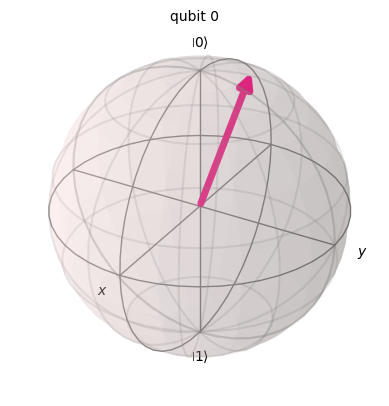

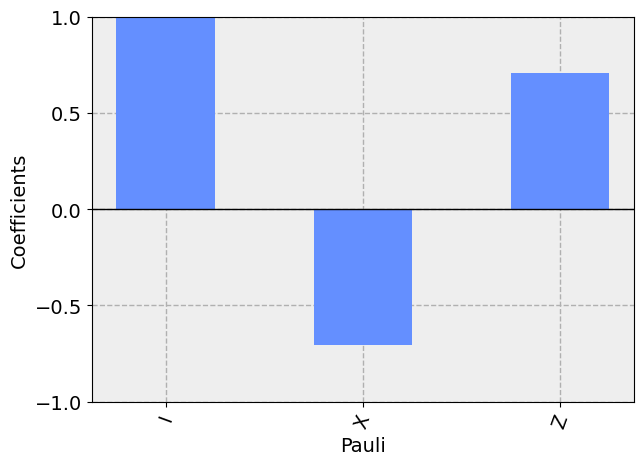

In [25]:
#org_sv = Statevector(circuit4)
org_sv = result.get_statevector()
print(f'Probabilities: {org_sv.probabilities()}')
print(f'Data: {org_sv.data}')
print(f'State vector: {org_sv.draw(output="repr")}')
display(org_sv.draw(output="bloch"))
display(org_sv.draw(output="paulivec"))

#### Test 2 - Angle encoding via individual qubit amplitudes

In [10]:
angle = [np.arccos(a) for a in test_amps]
print([round(np.pi / a, 3) for a in angle])

[1.5, 4.347]


In [11]:
def test_circuit_2(amplitudes, meas_qubit=0, add_meas=True):
    angle = [np.arccos(a) for a in amplitudes]
    qr = QuantumRegister(2, "q")
    cr = ClassicalRegister(1, "c")
    if add_meas:
        circuit = QuantumCircuit(qr, cr)
    else:
        circuit = QuantumCircuit(qr)
    circuit.ry(angle[0], qr[0])
    circuit.ry(angle[1], qr[1])
    #circuit.cx(qr[1], qr[0])
    if add_meas:
        circuit.measure(qr[meas_qubit], cr[0])
    return circuit

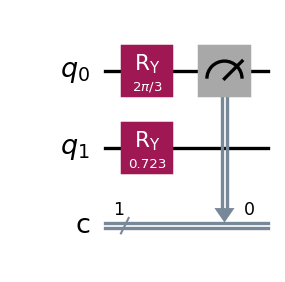

Counts: {'0': 2524, '1': 7476}
p(0) = 0.2524, p(1) = 0.7476, amp(0) = 0.502, amp(1) = 0.865
Angle: [2.0943951023931957, 0.7227342478134157]
Recovered Angle: 2.0888613514689087


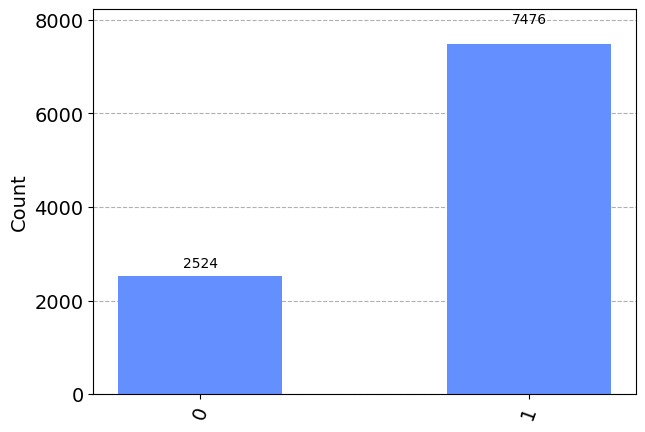

In [12]:
angles = [np.arccos(v) for v in test_amps]

circuit2 = test_circuit_2(test_amps, meas_qubit=0)
display(circuit2.draw("mpl", style="iqp", scale=1.2))

backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit2, shots=10000)
result = job.result()
counts = result.get_counts(circuit2)
print(f'Counts: {dict(sorted(counts.items()))}') 

counts0 = counts['0'] if '0' in counts.keys() else 0
counts1 = counts['1'] if '1' in counts.keys() else 0
p0 = counts0/(counts0+counts1)
p1 = counts1/(counts0+counts1)
amp0 = np.sqrt(p0)
amp1 = np.sqrt(p1)
print(f"p(0) = {p0}, p(1) = {p1}, amp(0) = {round(amp0, 3)}, amp(1) = {round(amp1, 3)}")
print(f'Angle: {angles}')
print(f'Recovered Angle: {2*np.arccos(amp0)}')
plot_histogram(counts)


Bloch vector: [3.6161010274519, 0, -6.344088557329955]


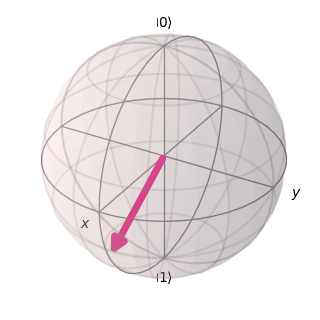

In [13]:
# Extract the Bloch vector components from the state vector
bloch_vector = convert_amps_to_xyz(amp0, amp1)
bloch_pi = [0 if b == 0 else np.pi / b for b in bloch_vector]
print(f'\nBloch vector: {bloch_pi}')

# Plot the Bloch vector on the Bloch sphere
display(plot_bloch_vector(bloch_vector, figsize=[3, 3]))

In [14]:
!pip list | grep -e qiskit -e torch -e tensorflow -e PennyLane

qiskit                        0.45.2
qiskit-aer-gpu                0.13.2
qiskit-algorithms             0.2.2
qiskit-dynamics               0.4.3
qiskit-finance                0.4.0
qiskit-ibm-provider           0.6.3
qiskit-ibm-runtime            0.11.3
qiskit-ibmq-provider          0.20.2
qiskit-machine-learning       0.7.1
qiskit-nature                 0.7.1
qiskit-optimization           0.6.0
qiskit-qasm3-import           0.4.1
qiskit-sphinx-theme           1.12.1
qiskit-terra                  0.45.2
torch                         2.1.0
torchaudio                    2.1.0
torchsummary                  1.5.1
torchvision                   0.16.0
